In [316]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

In [317]:
def make_numeric(data):
    num = re.findall('[0-9]+',data)
    if num:
        return float(num[0])
    else:
        return np.nan

def data_label(data):
    fuel_code = {'Diesel':1, 'Petrol':2, 'LPG':3, 'CNG':4,
                 'Individual':1, 'Dealer':2, 'Trustmark Dealer':3,
                  'Manual':1, 'Automatic':2, 
                  'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4, 'Test Drive Car':5,
                }
    return fuel_code[data]

In [318]:
df2 = pd.read_csv('data/car_price_data_2.csv', converters={'mileage': make_numeric, 
                                                           'engine': make_numeric, 
                                                           'max_power' : make_numeric,
                                                           'fuel': data_label,
                                                           'seller_type':data_label,
                                                           'transmission':data_label,
                                                           'owner': data_label,
                                                          })

In [319]:
df2['years_old'] = 2021 - df2.year
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,years_old
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.0,1248.0,74.0,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.0,1498.0,103.0,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.0,1497.0,78.0,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.0,1396.0,90.0,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.0,1298.0,88.0,"11.5@ 4,500(kgm@ rpm)",5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.0,1197.0,82.0,113.7Nm@ 4000rpm,5.0,8
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.0,1493.0,110.0,"24@ 1,900-2,750(kgm@ rpm)",5.0,14
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,1,19.0,1248.0,73.0,190Nm@ 2000rpm,5.0,12
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,1,23.0,1396.0,70.0,140Nm@ 1800-3000rpm,5.0,8


In [320]:
df2.drop(columns = ['name', 'torque', 'year'], inplace=True)

In [321]:
df2.info() # mileage, engine, max_power, seats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   int64  
 3   seller_type    8128 non-null   int64  
 4   transmission   8128 non-null   int64  
 5   owner          8128 non-null   int64  
 6   mileage        7907 non-null   float64
 7   engine         7907 non-null   float64
 8   max_power      7912 non-null   float64
 9   seats          7907 non-null   float64
 10  years_old      8128 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 698.6 KB


In [322]:
df2[~df2.mileage.notnull()]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,years_old
13,200000,80000,2,1,1,2,NaN,NaN,NaN,NaN,14
31,70000,50000,2,1,1,2,NaN,NaN,NaN,NaN,18
78,50000,70000,1,1,1,1,NaN,NaN,NaN,NaN,18
87,475000,78000,1,2,1,1,NaN,NaN,NaN,NaN,6
119,300000,120000,1,1,1,2,NaN,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...
7846,200000,100000,1,1,1,1,NaN,NaN,NaN,NaN,21
7996,140000,50000,2,1,1,2,NaN,NaN,NaN,NaN,21
8009,145000,80000,2,1,1,2,NaN,NaN,NaN,NaN,15
8068,580000,165000,1,1,1,1,NaN,NaN,NaN,NaN,4


In [331]:
range(-5,5)

range(-5, 5)

In [361]:
# sns.distplot(np.log(df2.selling_price))
# sns.distplot(np.log(df2.km_driven))
# sns.distplot(np.log(df2.fuel)) - No effect
# sns.distplot(np.log(df2.seller_type))  - No effect
# sns.distplot(np.log(df2.years_old))
for col in ['selling_price', 'km_driven', 'years_old']:
    df2[col] = np.log(df2[col])

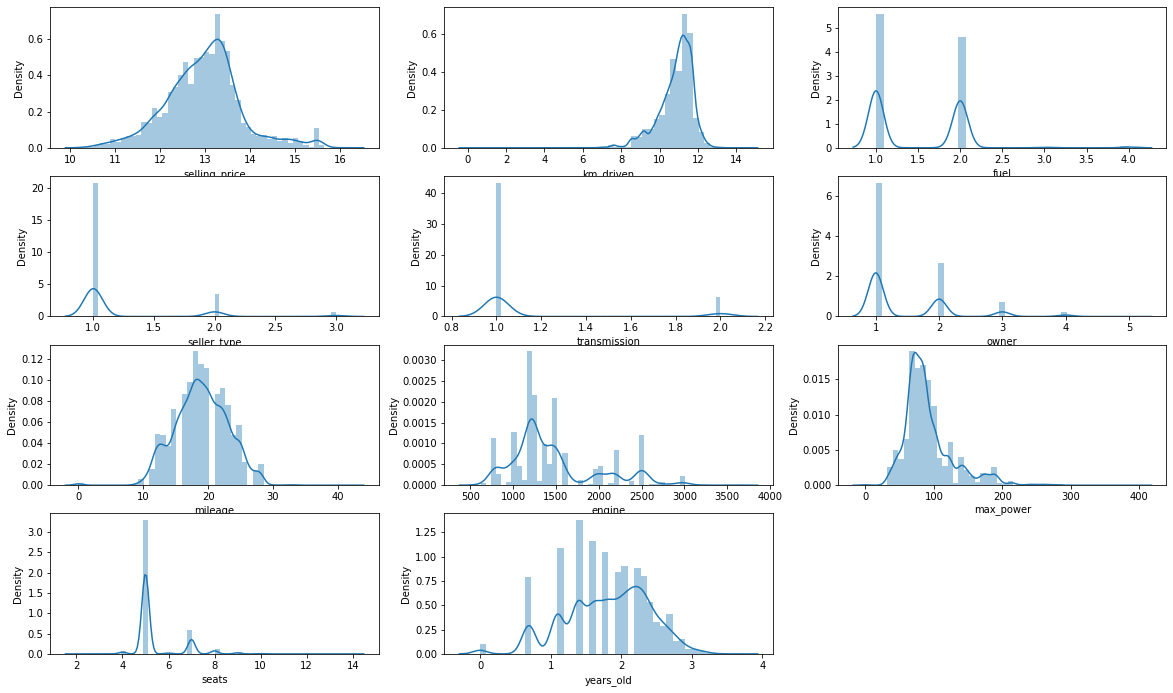

In [362]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15))
for i, column in enumerate(df2.columns):
    plt.subplot(5,3,i+1)
    sns.distplot(df2[column])

<AxesSubplot:>

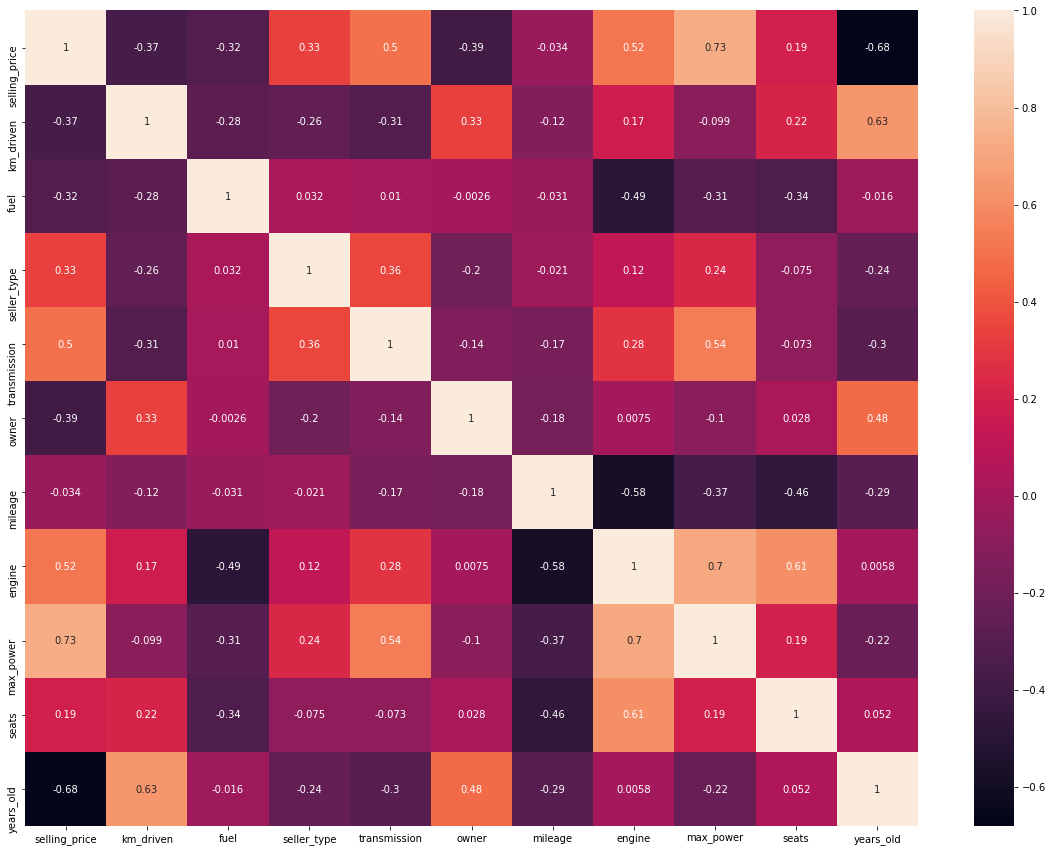

In [363]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(), annot=True)
# mileage, engine, max_power, seats

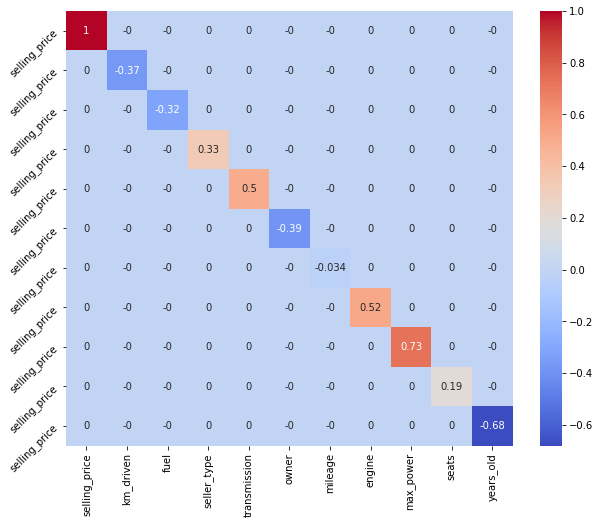

In [364]:
plt.figure(figsize=(10,8))
n_features = len(df2.columns)
heat_map_data = (df2.corrwith(df2.selling_price).values * np.ones((n_features,n_features))) * np.identity(n_features)
g = sns.heatmap(pd.DataFrame(heat_map_data, columns= df2.columns, index=['selling_price' for _ in range(len(df2.columns))]), annot=True, cmap='coolwarm') 
g.set_yticklabels(g.get_yticklabels(), rotation=45)
plt.show()

Text(0, 0.5, '# of cars')

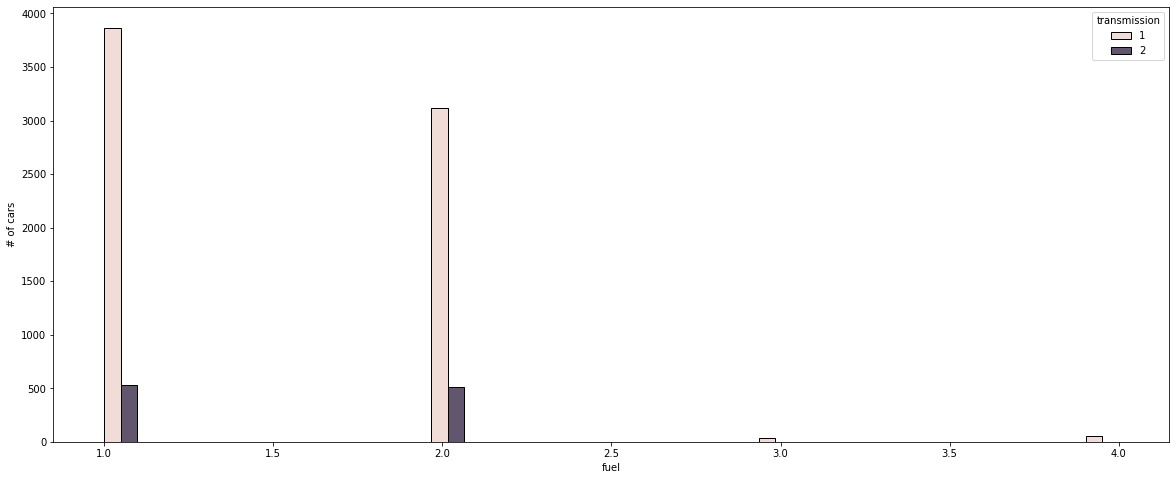

In [365]:
plt.figure(figsize=(20,8))
sns.histplot(multiple='dodge', x = 'fuel', data=df2, hue='transmission')
plt.ylabel('# of cars')

In [366]:
df2.drop(columns=['seats'], inplace=True)


Correlated columns for those columns which are missing data
* max_power - engine, selling_price,  #216
* engine - max_power, seats, selling_price #221
* seats - engine, #221
* mileage - #221

In [367]:
df = df2.dropna()
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,years_old
0,13.017003,11.887931,1,1,1,1,23.0,1248.0,74.0,1.945910
1,12.821258,11.695247,1,1,1,2,21.0,1498.0,103.0,1.945910
2,11.970350,11.849398,2,1,1,3,17.0,1497.0,78.0,2.708050
3,12.323856,11.751942,1,1,1,1,23.0,1396.0,90.0,2.397895
4,11.775290,11.695247,2,1,1,1,16.0,1298.0,88.0,2.639057
...,...,...,...,...,...,...,...,...,...,...
8123,12.676076,11.608236,2,1,1,1,18.0,1197.0,82.0,2.079442
8124,11.813030,11.686879,1,1,1,4,16.0,1493.0,110.0,2.639057
8125,12.853176,11.695247,1,1,1,1,19.0,1248.0,73.0,2.484907
8126,12.577636,10.126631,1,1,1,1,23.0,1396.0,70.0,2.079442


In [368]:
data_X = df.drop(columns=['selling_price'])
data_y = df['selling_price']
shuffled_X, shuffled_y = shuffle(data_X, data_y)
X_train, X_test, y_train, y_test = train_test_split(shuffled_X, shuffled_y, test_size=0.2, random_state=10)

In [369]:
model_lr = LinearRegression()

In [370]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [396]:
model_lr.score(X_train, y_train)

0.8443375351331458

In [395]:
model_lr.score(X_test, y_test)

0.8508459367776082

<AxesSubplot:title={'center':'Linear Regression'}>

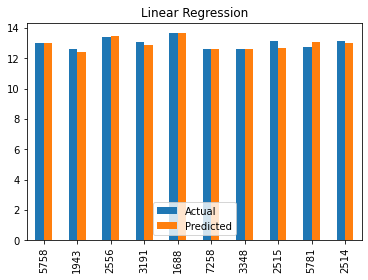

In [397]:
# Pick last 10 test sample and plot actual vs predicted.
x_compare = pd.DataFrame({'Actual':y_test.tail(10), 'Predicted':model_lr.predict(X_test.tail(10))})
x_compare.plot(kind='bar', title='Linear Regression')

In [390]:
size, train_scores, valid_scores = learning_curve(model_lr, data_X, data_y)

Text(0, 0.5, 'Score')

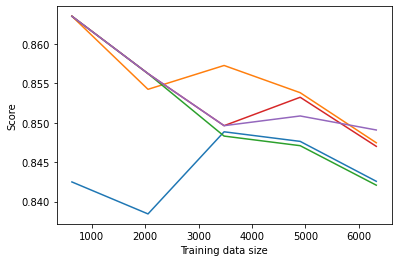

In [391]:
plt.plot(size, train_scores)
plt.xlabel('Training data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

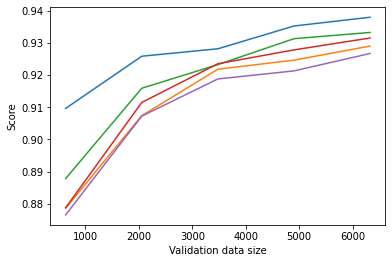

In [388]:
plt.plot(size, valid_scores)
plt.xlabel('Validation data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

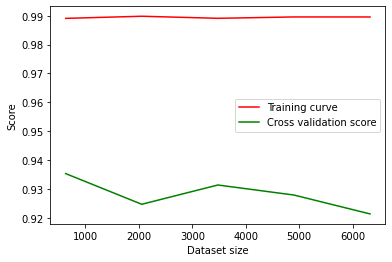

In [387]:
plt.plot(size, train_scores[3], label='Training curve',color='red')
plt.plot(size, valid_scores[3],label='Cross validation score', color='green')
plt.legend()
plt.xlabel('Dataset size')
plt.ylabel('Score')

In [376]:
model_rfr = RandomForestRegressor(n_estimators=100)

In [377]:
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [384]:
model_rfr.score(X_train, y_train)

0.9889715881098039

In [379]:
size, train_scores, valid_scores = learning_curve(model_rfr, data_X, data_y)

Text(0, 0.5, 'Score')

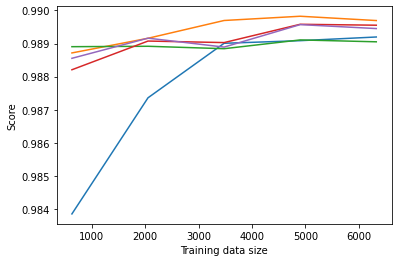

In [380]:
plt.plot(size, train_scores)
plt.xlabel('Training data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

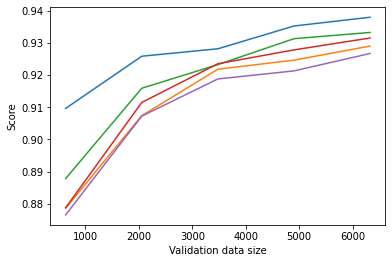

In [381]:
plt.plot(size, valid_scores)
plt.xlabel('Validation data size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

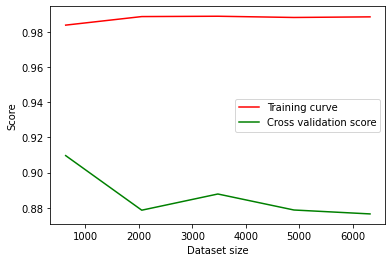

In [382]:
plt.plot(size, train_scores[0], label='Training curve',color='red')
plt.plot(size, valid_scores[0],label='Cross validation score', color='green')
plt.legend()
plt.xlabel('Dataset size')
plt.ylabel('Score')

<AxesSubplot:title={'center':'Random Forest Regressor'}>

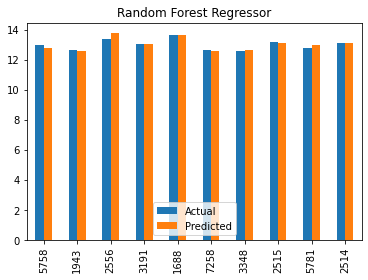

In [383]:
# Pick last 10 test sample and plot actual vs predicted.
x_compare = pd.DataFrame({'Actual':y_test.tail(10), 'Predicted':model_rfr.predict(X_test.tail(10))})
x_compare.plot(kind='bar', title='Random Forest Regressor')